<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 2 - Sentiment Analysis Model (Problem 1)</h2><h3>AY2020/21 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Packages
from tensorflow import keras
print('keras: ', keras.__version__)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
import os

keras:  2.2.4-tf


## Step 1 – Data Loading and Processing

### 1.1 Data Loading

In [2]:
# Load the emoji_dictionary
import pandas as pd
df = pd.read_csv('mapping.csv', delimiter=',')
emoji_dictionary = df.loc[:,'emoticons'].to_dict()
print(emoji_dictionary)
print('A total of: ', len(emoji_dictionary), 'Emoji Icons')

{0: '😍', 1: '😂', 2: '📷', 3: '🔥', 4: '❤'}
A total of:  5 Emoji Icons


In [3]:
# load the dataset
dat = pd.read_csv('dataset.csv', delimiter=',')
texts = dat.loc[:,'TEXT'].values 
labels = dat.loc[:,'Label'].values

In [4]:
# Check the maximum length of texts
max_len = -1
for example in texts:
    if len(example.split()) > max_len:
        max_len = len(example.split())
        
print('the maximum length of the text inputs is ', max_len)

the maximum length of the text inputs is  34


### 1.2 Data Processing


In [5]:
# Convert the texts and labels into numeric tensors
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

max_words = 100000
#maxlen = 34

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

def vectorize_sequences(sequences, dimension=5):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

X = pad_sequences(sequences, maxlen=max_len)
y = vectorize_sequences(labels)

print('Shape of data tensor:', X.shape)
print('Shape of label tensor:', y.shape)


Found 54076 unique tokens.
Shape of data tensor: (42546, 34)
Shape of label tensor: (42546, 5)


### 1.3 Data Sampling

In [6]:
# Split the X & y into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4)
# Refer the report Appendix
# Please enter the random_state assigned to your group

## Step 2 – Develop a Sentiment Analysis Model

### Model #1 (Basic Model)

In [112]:
# Build the Model
model = Sequential()
model.add(Embedding(max_words, 8, input_length=max_len, trainable=True))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_40 (Embedding)     (None, 34, 8)             80000     
_________________________________________________________________
lstm (LSTM)                  (None, 128)               70144     
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 512)               66048     
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 5)                 2565      
Total params: 218,757
Trainable params: 218,757
Non-trainable params: 0
_______________________________________________

In [ ]:
# Train the Model
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/50
213/213 [==============================] - 21s 100ms/step - loss: 1.4498 - acc: 0.4239 - val_loss: 1.4229 - val_acc: 0.4289
Epoch 2/50
213/213 [==============================] - 21s 99ms/step - loss: 1.4230 - acc: 0.4247 - val_loss: 1.4090 - val_acc: 0.4289
Epoch 3/50
213/213 [==============================] - 21s 98ms/step - loss: 1.4053 - acc: 0.4247 - val_loss: 1.3830 - val_acc: 0.4289
Epoch 4/50
213/213 [==============================] - 21s 98ms/step - loss: 1.3611 - acc: 0.4260 - val_loss: 1.3268 - val_acc: 0.4307
Epoch 5/50
213/213 [==============================] - 21s 99ms/step - loss: 1.2827 - acc: 0.4537 - val_loss: 1.2567 - val_acc: 0.4768
Epoch 6/50
213/213 [==============================] - 21s 98ms/step - loss: 1.2263 - acc: 0.4829 - val_loss: 1.2102 - val_acc: 0.4887
Epoch 7/50
213/213 [==============================] - 21s 98ms/step - loss: 1.1885 - acc: 0.4982 - val_loss: 1.1866 - val_acc: 0.4940
Epoch 8/50
213/213 [==============================] - 21s 98m

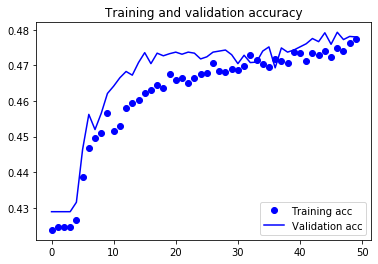

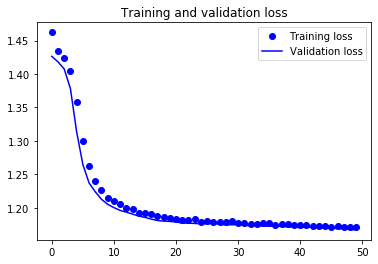

In [9]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #1.2 (Basic Model)

In [7]:
# Build the Model
model = Sequential()
model.add(layers.Embedding(max_words, 8, input_length=max_len))
model.add(LSTM(1024, return_sequences=True))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 8)             800000    
_________________________________________________________________
lstm (LSTM)                  (None, 34, 1024)          4231168   
_________________________________________________________________
flatten (Flatten)            (None, 34816)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                1114144   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 6,145,477
Trainable params: 6,145,477
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Train the Model

model.compile(optimizer=Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/60
426/426 [==============================] - 7s 16ms/step - loss: 1.4348 - acc: 0.4247 - val_loss: 1.4014 - val_acc: 0.4289
Epoch 2/60
426/426 [==============================] - 6s 15ms/step - loss: 1.3102 - acc: 0.4332 - val_loss: 1.2500 - val_acc: 0.4371
Epoch 3/60
426/426 [==============================] - 6s 15ms/step - loss: 1.2196 - acc: 0.4530 - val_loss: 1.2075 - val_acc: 0.4587
Epoch 4/60
426/426 [==============================] - 6s 15ms/step - loss: 1.2028 - acc: 0.4536 - val_loss: 1.2025 - val_acc: 0.4556
Epoch 5/60
426/426 [==============================] - 6s 15ms/step - loss: 1.1984 - acc: 0.4561 - val_loss: 1.2015 - val_acc: 0.4559
Epoch 6/60
426/426 [==============================] - 6s 15ms/step - loss: 1.1956 - acc: 0.4575 - val_loss: 1.1982 - val_acc: 0.4645
Epoch 7/60
426/426 [==============================] - 6s 15ms/step - loss: 1.1933 - acc: 0.4558 - val_loss: 1.1927 - val_acc: 0.4624
Epoch 8/60
426/426 [==============================] - 6s 15ms/step - 

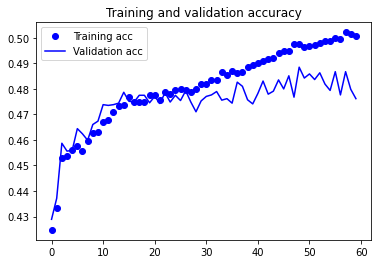

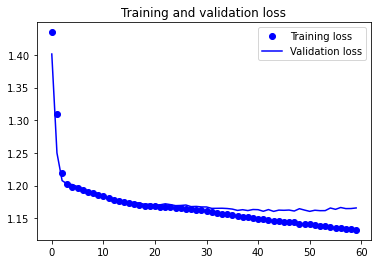

In [11]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #1.3 (Basic Model)

In [ ]:
# Build the Model
model = Sequential()
model.add(layers.Embedding(max_words, 100, input_length=max_len))
model.add(LSTM(1024, return_sequences=True))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

In [ ]:
# Train the Model

model.compile(optimizer=Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=60,
                    batch_size=64,
                    validation_split=0.2)

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #2.1 (GLOVE.Twitter)

In [21]:
glove_dir = 'C:/Users/Darien Tan/OneDrive - Ngee Ann Polytechnic/Ngee Ann Poly/Year 2/DL/Assignment 2'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.twitter.27B.200d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 1193514 word vectors.


In [14]:
# Build the Model

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 34, 100)           10000000  
_________________________________________________________________
flatten_2 (Flatten)          (None, 3400)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                108832    
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 165       
Total params: 10,108,997
Trainable params: 10,108,997
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 34, 100)           10000000  
____________________

In [15]:
# Train the Model
model.compile(optimizer=RMSprop(lr=1e-3),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/20
213/213 [==============================] - 18s 85ms/step - loss: 1.1901 - acc: 0.5244 - val_loss: 1.0740 - val_acc: 0.5748
Epoch 2/20
213/213 [==============================] - 18s 86ms/step - loss: 0.9383 - acc: 0.6359 - val_loss: 0.9997 - val_acc: 0.6049
Epoch 3/20
213/213 [==============================] - 18s 86ms/step - loss: 0.7749 - acc: 0.7020 - val_loss: 0.9797 - val_acc: 0.6144
Epoch 4/20
213/213 [==============================] - 18s 85ms/step - loss: 0.6430 - acc: 0.7630 - val_loss: 0.9828 - val_acc: 0.6251
Epoch 5/20
213/213 [==============================] - 18s 85ms/step - loss: 0.5250 - acc: 0.8126 - val_loss: 1.0222 - val_acc: 0.6323
Epoch 6/20
213/213 [==============================] - 18s 86ms/step - loss: 0.4226 - acc: 0.8547 - val_loss: 1.0691 - val_acc: 0.6409
Epoch 7/20
213/213 [==============================] - 18s 85ms/step - loss: 0.3302 - acc: 0.8905 - val_loss: 1.1327 - val_acc: 0.6410
Epoch 8/20
213/213 [==============================] - 18s 85ms

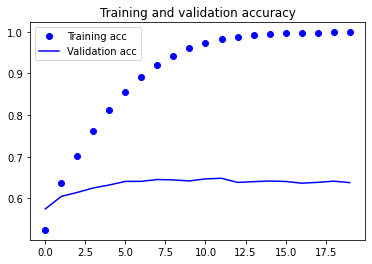

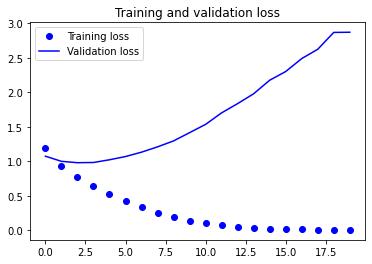

In [16]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('text_model_1.h5')

### Model #2.2 (GLOVE.Twitter, batch size = 64)

In [17]:
glove_dir = 'C:/Users/Darien Tan/OneDrive - Ngee Ann Polytechnic/Ngee Ann Poly/Year 2/DL/Assignment 2'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.twitter.27B.200d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Darien Tan/OneDrive - Ngee Ann Polytechnic/Ngee Ann Poly/Year 2/DL/Assignment 2/glove.twitter.27B.200d.txt'

In [18]:
# Build the Model

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 34, 100)           10000000  
_________________________________________________________________
flatten_3 (Flatten)          (None, 3400)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                108832    
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 165       
Total params: 10,108,997
Trainable params: 10,108,997
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 34, 100)           10000000  
____________________

In [19]:
# Train the Model
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/20
426/426 [==============================] - 36s 86ms/step - loss: 1.3463 - acc: 0.4438 - val_loss: 1.2551 - val_acc: 0.4952
Epoch 2/20
426/426 [==============================] - 37s 86ms/step - loss: 1.1934 - acc: 0.5231 - val_loss: 1.1766 - val_acc: 0.5326
Epoch 3/20
426/426 [==============================] - 36s 86ms/step - loss: 1.1143 - acc: 0.5589 - val_loss: 1.1284 - val_acc: 0.5557
Epoch 4/20
426/426 [==============================] - 36s 85ms/step - loss: 1.0579 - acc: 0.5840 - val_loss: 1.1014 - val_acc: 0.5601
Epoch 5/20
426/426 [==============================] - 37s 86ms/step - loss: 1.0121 - acc: 0.6031 - val_loss: 1.0740 - val_acc: 0.5765
Epoch 6/20
426/426 [==============================] - 36s 85ms/step - loss: 0.9733 - acc: 0.6205 - val_loss: 1.0537 - val_acc: 0.5828
Epoch 7/20
426/426 [==============================] - 37s 86ms/step - loss: 0.9383 - acc: 0.6346 - val_loss: 1.0380 - val_acc: 0.5903
Epoch 8/20
426/426 [==============================] - 36s 85ms

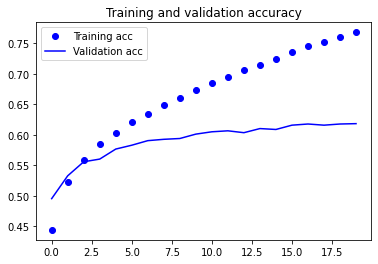

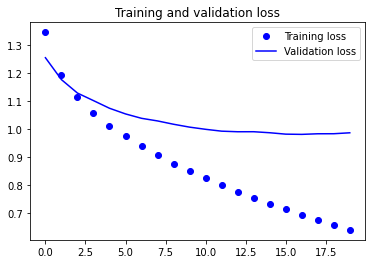

In [20]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #2.3 (GLOVE.Twitter, batch size = 64, Optimizer = Adam)

In [29]:
glove_dir = 'C:/Users/Darien Tan/OneDrive - Ngee Ann Polytechnic/Ngee Ann Poly/Year 2/DL/Assignment 2'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.twitter.27B.200d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 1193514 word vectors.


In [21]:
# Build the Model

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 34, 100)           10000000  
_________________________________________________________________
flatten_4 (Flatten)          (None, 3400)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                108832    
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 165       
Total params: 10,108,997
Trainable params: 10,108,997
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 34, 100)           10000000  
____________________

In [22]:
# Train the Model
model.compile(optimizer=Adam(lr=5e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/20
213/213 [==============================] - 22s 102ms/step - loss: 1.2653 - acc: 0.4893 - val_loss: 1.1146 - val_acc: 0.5642
Epoch 2/20
213/213 [==============================] - 21s 101ms/step - loss: 1.0049 - acc: 0.6114 - val_loss: 1.0261 - val_acc: 0.5964
Epoch 3/20
213/213 [==============================] - 22s 101ms/step - loss: 0.8318 - acc: 0.6861 - val_loss: 0.9752 - val_acc: 0.6165
Epoch 4/20
213/213 [==============================] - 22s 101ms/step - loss: 0.6734 - acc: 0.7596 - val_loss: 0.9607 - val_acc: 0.6323
Epoch 5/20
213/213 [==============================] - 22s 102ms/step - loss: 0.5269 - acc: 0.8241 - val_loss: 0.9700 - val_acc: 0.6356
Epoch 6/20
213/213 [==============================] - 22s 102ms/step - loss: 0.3948 - acc: 0.8774 - val_loss: 1.0074 - val_acc: 0.6459
Epoch 7/20
213/213 [==============================] - 22s 101ms/step - loss: 0.2865 - acc: 0.9175 - val_loss: 1.0525 - val_acc: 0.6464
Epoch 8/20
213/213 [==============================] - 2

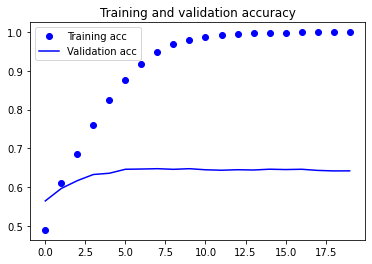

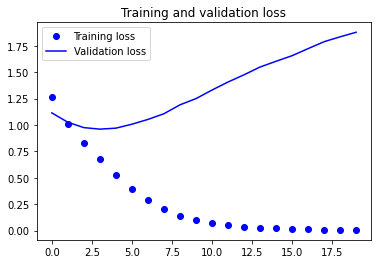

In [23]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #2.4 (Basic Model + GLOVE.Twitter, batch size = 32, optimizer = Adam)

In [33]:
glove_dir = 'C:/Users/Darien Tan/OneDrive - Ngee Ann Polytechnic/Ngee Ann Poly/Year 2/DL/Assignment 2'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.twitter.27B.200d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 1193514 word vectors.


In [24]:
# Build the Model

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 34, 100)           10000000  
_________________________________________________________________
flatten_5 (Flatten)          (None, 3400)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                108832    
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 165       
Total params: 10,108,997
Trainable params: 10,108,997
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 34, 100)           10000000  
____________________

In [25]:
# Train the Model
model.compile(optimizer=Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/15
851/851 [==============================] - 85s 100ms/step - loss: 1.3367 - acc: 0.4505 - val_loss: 1.2152 - val_acc: 0.5137
Epoch 2/15
851/851 [==============================] - 85s 100ms/step - loss: 1.1328 - acc: 0.5477 - val_loss: 1.1168 - val_acc: 0.5582
Epoch 3/15
851/851 [==============================] - 85s 100ms/step - loss: 1.0248 - acc: 0.6003 - val_loss: 1.0663 - val_acc: 0.5759
Epoch 4/15
851/851 [==============================] - 85s 100ms/step - loss: 0.9415 - acc: 0.6388 - val_loss: 1.0305 - val_acc: 0.5893
Epoch 5/15
851/851 [==============================] - 86s 101ms/step - loss: 0.8679 - acc: 0.6721 - val_loss: 1.0069 - val_acc: 0.5974
Epoch 6/15
851/851 [==============================] - 85s 100ms/step - loss: 0.8024 - acc: 0.6984 - val_loss: 0.9873 - val_acc: 0.6100
Epoch 7/15
851/851 [==============================] - 86s 101ms/step - loss: 0.7403 - acc: 0.7285 - val_loss: 0.9772 - val_acc: 0.6171
Epoch 8/15
851/851 [==============================] - 8

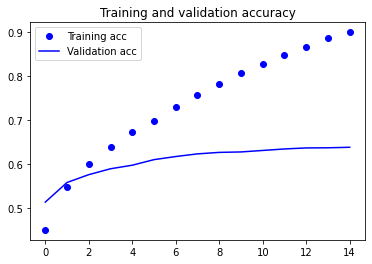

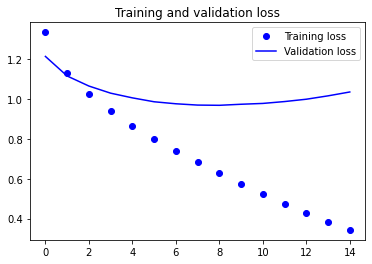

In [26]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #2.5 (Basic Model + GLOVE.Twitter, batch size = 128, optimizer = SGD)

In [37]:
glove_dir = 'C:/Users/Darien Tan/OneDrive - Ngee Ann Polytechnic/Ngee Ann Poly/Year 2/DL/Assignment 2'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.twitter.27B.200d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 1193514 word vectors.


In [27]:
# Build the Model

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 34, 100)           10000000  
_________________________________________________________________
flatten_6 (Flatten)          (None, 3400)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                108832    
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 165       
Total params: 10,108,997
Trainable params: 10,108,997
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 34, 100)           10000000  
____________________

In [28]:
# Train the Model
model.compile(optimizer=SGD(lr=1e-3, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/30
213/213 [==============================] - 1s 6ms/step - loss: 1.4364 - acc: 0.4107 - val_loss: 1.3682 - val_acc: 0.4509
Epoch 2/30
213/213 [==============================] - 1s 5ms/step - loss: 1.3320 - acc: 0.4600 - val_loss: 1.2965 - val_acc: 0.4828
Epoch 3/30
213/213 [==============================] - 1s 5ms/step - loss: 1.2684 - acc: 0.4905 - val_loss: 1.2521 - val_acc: 0.5116
Epoch 4/30
213/213 [==============================] - 1s 5ms/step - loss: 1.2217 - acc: 0.5114 - val_loss: 1.2162 - val_acc: 0.5207
Epoch 5/30
213/213 [==============================] - 1s 5ms/step - loss: 1.1856 - acc: 0.5272 - val_loss: 1.1907 - val_acc: 0.5314
Epoch 6/30
213/213 [==============================] - 1s 5ms/step - loss: 1.1575 - acc: 0.5379 - val_loss: 1.1720 - val_acc: 0.5360
Epoch 7/30
213/213 [==============================] - 1s 5ms/step - loss: 1.1332 - acc: 0.5513 - val_loss: 1.1620 - val_acc: 0.5405
Epoch 8/30
213/213 [==============================] - 1s 5ms/step - loss: 1.

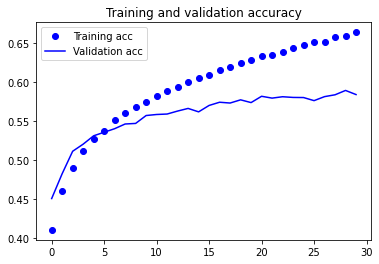

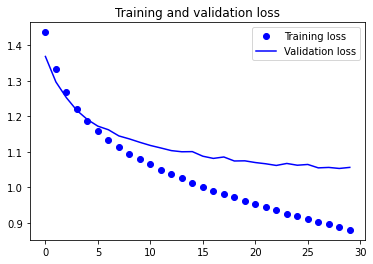

In [29]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #2.6 (Basic Model + GLOVE.Twitter (Non-trainable), batch size = 128, optimizer = SGD)

In [45]:
glove_dir = 'C:/Users/Darien Tan/OneDrive - Ngee Ann Polytechnic/Ngee Ann Poly/Year 2/DL/Assignment 2'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.twitter.27B.200d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 1193514 word vectors.


In [30]:
# Build the Model

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 34, 100)           10000000  
_________________________________________________________________
flatten_7 (Flatten)          (None, 3400)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                108832    
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 165       
Total params: 10,108,997
Trainable params: 10,108,997
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 34, 100)           10000000  
____________________

In [31]:
# Train the Model
model.compile(optimizer=SGD(lr=1e-3, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/30
213/213 [==============================] - 1s 4ms/step - loss: 1.4141 - acc: 0.4196 - val_loss: 1.3530 - val_acc: 0.4556
Epoch 2/30
213/213 [==============================] - 1s 4ms/step - loss: 1.3197 - acc: 0.4646 - val_loss: 1.2907 - val_acc: 0.4796
Epoch 3/30
213/213 [==============================] - 1s 4ms/step - loss: 1.2632 - acc: 0.4942 - val_loss: 1.2512 - val_acc: 0.5037
Epoch 4/30
213/213 [==============================] - 1s 4ms/step - loss: 1.2253 - acc: 0.5133 - val_loss: 1.2247 - val_acc: 0.5138
Epoch 5/30
213/213 [==============================] - 1s 4ms/step - loss: 1.1946 - acc: 0.5274 - val_loss: 1.2067 - val_acc: 0.5238
Epoch 6/30
213/213 [==============================] - 1s 4ms/step - loss: 1.1710 - acc: 0.5392 - val_loss: 1.1942 - val_acc: 0.5260
Epoch 7/30
213/213 [==============================] - 1s 3ms/step - loss: 1.1505 - acc: 0.5462 - val_loss: 1.1787 - val_acc: 0.5354
Epoch 8/30
213/213 [==============================] - 1s 4ms/step - loss: 1.

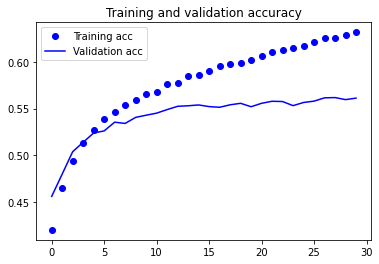

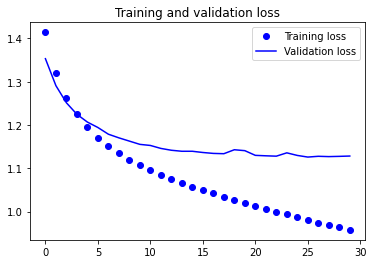

In [32]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #2.7 (Basic Model + LSTM + GLOVE.Twitter, batch size = 128, optimizer = SGD)

In [49]:
glove_dir = 'C:/Users/Darien Tan/OneDrive - Ngee Ann Polytechnic/Ngee Ann Poly/Year 2/DL/Assignment 2'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.twitter.27B.200d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 1193514 word vectors.


In [33]:
# Build the Model

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(64, return_sequences=True))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 34, 100)           10000000  
_________________________________________________________________
lstm (LSTM)                  (None, 34, 64)            42240     
_________________________________________________________________
flatten_8 (Flatten)          (None, 2176)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                69664     
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 165       
Total params: 10,112,069
Trainable params: 10,112,069
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_8"
_________________________________________________________________
Layer (type)        

In [34]:
# Train the Model
model.compile(optimizer=SGD(lr=1e-3, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/30
213/213 [==============================] - 2s 10ms/step - loss: 1.4465 - acc: 0.4151 - val_loss: 1.3976 - val_acc: 0.4317
Epoch 2/30
213/213 [==============================] - 2s 9ms/step - loss: 1.3796 - acc: 0.4374 - val_loss: 1.3504 - val_acc: 0.4617
Epoch 3/30
213/213 [==============================] - 2s 9ms/step - loss: 1.3282 - acc: 0.4621 - val_loss: 1.2937 - val_acc: 0.4821
Epoch 4/30
213/213 [==============================] - 2s 9ms/step - loss: 1.2788 - acc: 0.4833 - val_loss: 1.2521 - val_acc: 0.5018
Epoch 5/30
213/213 [==============================] - 2s 10ms/step - loss: 1.2406 - acc: 0.4996 - val_loss: 1.2204 - val_acc: 0.5134
Epoch 6/30
213/213 [==============================] - 2s 9ms/step - loss: 1.2136 - acc: 0.5138 - val_loss: 1.1939 - val_acc: 0.5254
Epoch 7/30
213/213 [==============================] - 2s 10ms/step - loss: 1.1927 - acc: 0.5262 - val_loss: 1.1773 - val_acc: 0.5330
Epoch 8/30
213/213 [==============================] - 2s 9ms/step - loss:

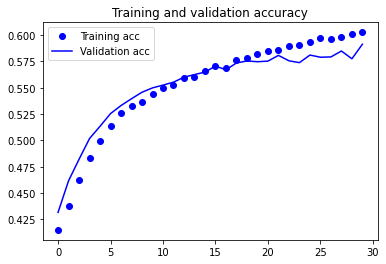

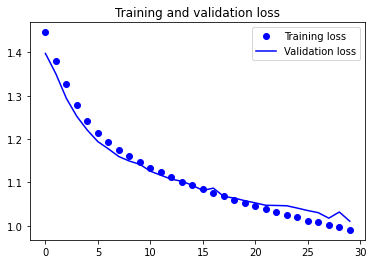

In [35]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #2.8 (Basic Model + LSTM + GLOVE.Twitter, batch size = 128, optimizer = SGD, regularizer implemented)

In [10]:
glove_dir = ''

embeddings_index = {}
f = open('glove.twitter.27B.100d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 1193514 word vectors.


In [36]:
# Build the Model
from tensorflow.keras import regularizers

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(200, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 34, 100)           10000000  
_________________________________________________________________
flatten_9 (Flatten)          (None, 3400)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 200)               680200    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 1005      
Total params: 10,681,205
Trainable params: 10,681,205
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_9"
_________________________________________________________________
Layer (type)        

In [37]:
# Train the Model
model.compile(optimizer=Adam(lr=1e-3),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/30
213/213 [==============================] - 21s 97ms/step - loss: 1.4121 - acc: 0.5118 - val_loss: 1.2151 - val_acc: 0.5877
Epoch 2/30
213/213 [==============================] - 21s 98ms/step - loss: 1.0931 - acc: 0.6365 - val_loss: 1.1217 - val_acc: 0.6156
Epoch 3/30
213/213 [==============================] - 21s 98ms/step - loss: 0.9026 - acc: 0.7215 - val_loss: 1.1041 - val_acc: 0.6359
Epoch 4/30
213/213 [==============================] - 21s 98ms/step - loss: 0.7370 - acc: 0.7998 - val_loss: 1.1332 - val_acc: 0.6434
Epoch 5/30
213/213 [==============================] - 21s 98ms/step - loss: 0.5890 - acc: 0.8614 - val_loss: 1.2151 - val_acc: 0.6491
Epoch 6/30
213/213 [==============================] - 21s 98ms/step - loss: 0.4700 - acc: 0.9074 - val_loss: 1.2874 - val_acc: 0.6494
Epoch 7/30
213/213 [==============================] - 21s 98ms/step - loss: 0.3750 - acc: 0.9379 - val_loss: 1.3716 - val_acc: 0.6578
Epoch 8/30
213/213 [==============================] - 21s 99ms

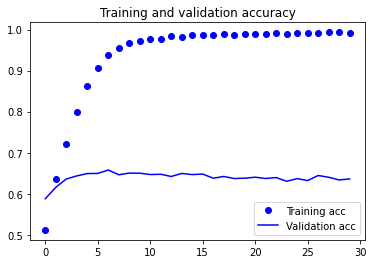

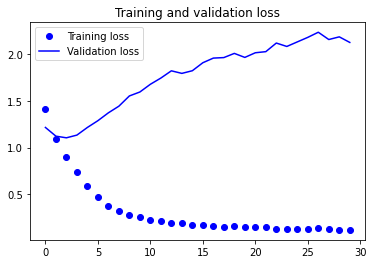

In [38]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #2.9 (Basic Model + LSTM + GLOVE.Twitter, batch size = 128, optimizer = SGD, regularizer implemented)

In [9]:
glove_dir = ''

embeddings_index = {}
f = open('glove.twitter.27B.100d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 1193514 word vectors.


In [12]:
# Build the Model
from tensorflow.keras import regularizers

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(200, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(5, activation='softmax'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 34, 100)           10000000  
_________________________________________________________________
flatten_1 (Flatten)          (None, 3400)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               680200    
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 1005      
Total params: 10,681,205
Trainable params: 10,681,205
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 34, 100)           10000000  
____________________

In [13]:
# Train the Model
model.compile(optimizer=Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/30
213/213 [==============================] - 22s 101ms/step - loss: 1.6351 - acc: 0.4512 - val_loss: 1.4668 - val_acc: 0.5200
Epoch 2/30
213/213 [==============================] - 21s 101ms/step - loss: 1.3665 - acc: 0.5506 - val_loss: 1.3458 - val_acc: 0.5448
Epoch 3/30
213/213 [==============================] - 21s 101ms/step - loss: 1.2460 - acc: 0.5919 - val_loss: 1.2842 - val_acc: 0.5630
Epoch 4/30
213/213 [==============================] - 21s 100ms/step - loss: 1.1632 - acc: 0.6228 - val_loss: 1.2468 - val_acc: 0.5756
Epoch 5/30
213/213 [==============================] - 21s 100ms/step - loss: 1.0925 - acc: 0.6484 - val_loss: 1.2170 - val_acc: 0.5848
Epoch 6/30
213/213 [==============================] - 21s 100ms/step - loss: 1.0292 - acc: 0.6730 - val_loss: 1.1968 - val_acc: 0.5867
Epoch 7/30
213/213 [==============================] - 21s 100ms/step - loss: 0.9718 - acc: 0.6981 - val_loss: 1.1765 - val_acc: 0.5964
Epoch 8/30
213/213 [==============================] - 2

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #2.8 (Basic Model + LSTM + GLOVE.Twitter, batch size = 128, optimizer = SGD, regularizer implemented)

In [10]:
glove_dir = ''

embeddings_index = {}
f = open('glove.twitter.27B.100d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 1193514 word vectors.


In [39]:
# Build the Model
from tensorflow.keras import regularizers

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(200, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 34, 100)           10000000  
_________________________________________________________________
flatten_10 (Flatten)         (None, 3400)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 200)               680200    
_________________________________________________________________
dense_21 (Dense)             (None, 200)               40200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 1005      
Total params: 10,721,405
Trainable params: 10,721,405
Non-trainable params: 0
_________________________________________

In [40]:
# Train the Model
model.compile(optimizer=Adam(lr=1e-3),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/30
213/213 [==============================] - 21s 99ms/step - loss: 1.3905 - acc: 0.5189 - val_loss: 1.1906 - val_acc: 0.5883
Epoch 2/30
213/213 [==============================] - 21s 98ms/step - loss: 1.0406 - acc: 0.6537 - val_loss: 1.1116 - val_acc: 0.6177
Epoch 3/30
213/213 [==============================] - 21s 99ms/step - loss: 0.7872 - acc: 0.7651 - val_loss: 1.1374 - val_acc: 0.6334
Epoch 4/30
213/213 [==============================] - 21s 99ms/step - loss: 0.5589 - acc: 0.8638 - val_loss: 1.3317 - val_acc: 0.6507
Epoch 5/30
213/213 [==============================] - 21s 98ms/step - loss: 0.3961 - acc: 0.9309 - val_loss: 1.5444 - val_acc: 0.6410
Epoch 6/30
213/213 [==============================] - 21s 98ms/step - loss: 0.3180 - acc: 0.9597 - val_loss: 1.7759 - val_acc: 0.6431
Epoch 7/30
213/213 [==============================] - 21s 99ms/step - loss: 0.2711 - acc: 0.9707 - val_loss: 1.8513 - val_acc: 0.6378
Epoch 8/30
213/213 [==============================] - 21s 98ms

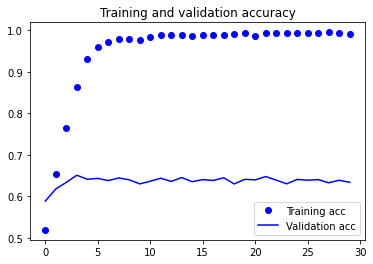

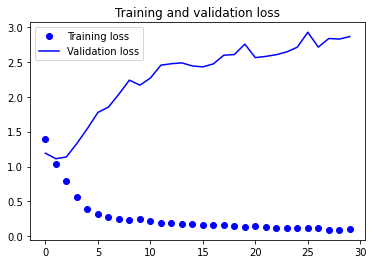

In [41]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #2.8 (Basic Model + LSTM + GLOVE.Twitter, batch size = 128, optimizer = SGD, regularizer implemented)

In [10]:
glove_dir = ''

embeddings_index = {}
f = open('glove.twitter.27B.100d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Found 1193514 word vectors.


In [ ]:
# Build the Model
from tensorflow.keras import regularizers

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(200, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.summary()

In [ ]:
# Train the Model
model.compile(optimizer=Adam(lr=1e-3),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2)

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #3 (Conv1D)

In [33]:
# Convert the texts and labels into numeric tensors
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

import numpy as np
#training_samples = 20000 # We will be training on 20000 samples
#validation_samples = 5000 # We will be validating on 5000 samples
max_words = 10000 # We will only consider the top 10,000 words (vocabulary) in the dataset (dictionary)
tokenizer = Tokenizer(num_words=max_words)
# Updates internal vocabulary based on a list of texts.
# In the case where texts contains lists, we assume each entry of the lists to be a token.
tokenizer.fit_on_texts(texts)
# Transforms each text in texts to a sequence of integers.
# Only top num_words-1 most frequent words will be taken into account.
# Only words known by the tokenizer will be taken into account.
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=max_len)
labels = np.asarray(labels)
X, y = data, to_categorical(labels)

print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)


Found 54076 unique tokens.
Shape of data tensor: (42546, 34)
Shape of label tensor: (42546,)


### 1.3 Data Sampling

In [34]:
# Split the X & y into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4)
# Refer the report Appendix
# Please enter the random_state assigned to your group

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_words, 128, input_length=max_len))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(5, activation='softmax'))

model.summary()



Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 34, 128)           1280000   
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 30, 32)            20512     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 6, 32)             0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 2, 32)             5152      
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 165       
Total params: 1,305,829
Trainable params: 1,305,829
Non-trainable params: 0
___________________________________________

In [39]:
# Train the Model
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=60,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/60
213/213 [==============================] - 2s 11ms/step - loss: 1.4700 - acc: 0.4239 - val_loss: 1.4171 - val_acc: 0.4289
Epoch 2/60
213/213 [==============================] - 2s 10ms/step - loss: 1.3976 - acc: 0.4247 - val_loss: 1.3628 - val_acc: 0.4289
Epoch 3/60
213/213 [==============================] - 2s 10ms/step - loss: 1.3050 - acc: 0.4252 - val_loss: 1.2564 - val_acc: 0.4314
Epoch 4/60
213/213 [==============================] - 2s 10ms/step - loss: 1.2164 - acc: 0.4685 - val_loss: 1.1999 - val_acc: 0.4856
Epoch 5/60
213/213 [==============================] - 2s 10ms/step - loss: 1.1733 - acc: 0.5145 - val_loss: 1.1740 - val_acc: 0.5032
Epoch 6/60
213/213 [==============================] - 2s 10ms/step - loss: 1.1429 - acc: 0.5351 - val_loss: 1.1534 - val_acc: 0.5138
Epoch 7/60
213/213 [==============================] - 2s 10ms/step - loss: 1.1138 - acc: 0.5477 - val_loss: 1.1348 - val_acc: 0.5206
Epoch 8/60
213/213 [==============================] - 2s 10ms/step - 

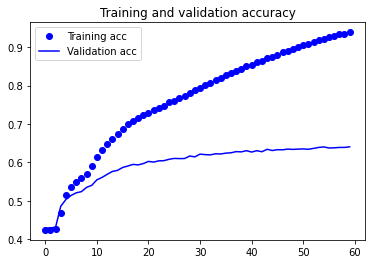

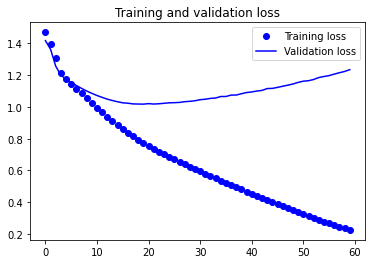

In [40]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #3 (Conv1D)

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_words, 128, input_length=max_len))
model.add(layers.Conv1D(2048, 5, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(1024, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(5, activation='softmax'))

model.summary()


Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_32 (Embedding)     (None, 34, 128)           1280000   
_________________________________________________________________
conv1d_78 (Conv1D)           (None, 30, 2048)          1312768   
_________________________________________________________________
max_pooling1d_52 (MaxPooling (None, 6, 2048)           0         
_________________________________________________________________
conv1d_79 (Conv1D)           (None, 2, 1024)           10486784  
_________________________________________________________________
global_max_pooling1d_23 (Glo (None, 1024)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 5)                 5125      
Total params: 13,084,677
Trainable params: 13,084,677
Non-trainable params: 0
_________________________________________

In [91]:
# Train the Model
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=19,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/19
213/213 [==============================] - 5s 22ms/step - loss: 1.2582 - acc: 0.4527 - val_loss: 1.1546 - val_acc: 0.4960
Epoch 2/19
213/213 [==============================] - 5s 22ms/step - loss: 1.0885 - acc: 0.5385 - val_loss: 1.0902 - val_acc: 0.5380
Epoch 3/19
213/213 [==============================] - 5s 21ms/step - loss: 0.9836 - acc: 0.6024 - val_loss: 1.0253 - val_acc: 0.5824
Epoch 4/19
213/213 [==============================] - 5s 22ms/step - loss: 0.8878 - acc: 0.6514 - val_loss: 0.9872 - val_acc: 0.6024
Epoch 5/19
213/213 [==============================] - 5s 21ms/step - loss: 0.8056 - acc: 0.6900 - val_loss: 0.9744 - val_acc: 0.6137
Epoch 6/19
213/213 [==============================] - 5s 22ms/step - loss: 0.7298 - acc: 0.7269 - val_loss: 0.9775 - val_acc: 0.6160
Epoch 7/19
213/213 [==============================] - 5s 21ms/step - loss: 0.6565 - acc: 0.7630 - val_loss: 0.9892 - val_acc: 0.6274
Epoch 8/19
213/213 [==============================] - 5s 22ms/step - 

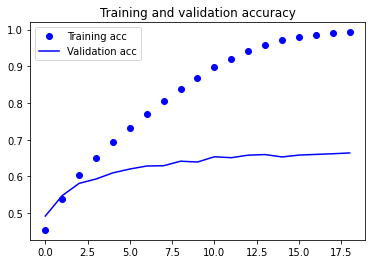

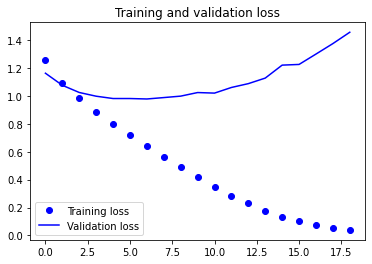

In [87]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model #3 (Conv1D)

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_words, 128, input_length=max_len))
model.add(layers.Conv1D(1024, 5, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(Dropout(0.5))
model.add(layers.Conv1D(2048, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(5, activation='softmax'))

model.summary()


Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_39 (Embedding)     (None, 34, 128)           1280000   
_________________________________________________________________
conv1d_92 (Conv1D)           (None, 30, 1024)          656384    
_________________________________________________________________
max_pooling1d_59 (MaxPooling (None, 6, 1024)           0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 6, 1024)           0         
_________________________________________________________________
conv1d_93 (Conv1D)           (None, 2, 2048)           10487808  
_________________________________________________________________
global_max_pooling1d_30 (Glo (None, 2048)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 5)               

In [106]:
# Train the Model
model.compile(optimizer=Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=60,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/60
213/213 [==============================] - 4s 18ms/step - loss: 1.3079 - acc: 0.4411 - val_loss: 1.1606 - val_acc: 0.4960
Epoch 2/60
213/213 [==============================] - 4s 18ms/step - loss: 1.0801 - acc: 0.5433 - val_loss: 1.0688 - val_acc: 0.5520
Epoch 3/60
213/213 [==============================] - 4s 18ms/step - loss: 0.9398 - acc: 0.6202 - val_loss: 1.0088 - val_acc: 0.5928
Epoch 4/60
213/213 [==============================] - 4s 18ms/step - loss: 0.8183 - acc: 0.6819 - val_loss: 0.9972 - val_acc: 0.6127
Epoch 5/60
213/213 [==============================] - 4s 18ms/step - loss: 0.7084 - acc: 0.7298 - val_loss: 1.0179 - val_acc: 0.6159
Epoch 6/60
213/213 [==============================] - 4s 18ms/step - loss: 0.6131 - acc: 0.7740 - val_loss: 1.0564 - val_acc: 0.6228
Epoch 7/60
213/213 [==============================] - 4s 18ms/step - loss: 0.5290 - acc: 0.8105 - val_loss: 1.0963 - val_acc: 0.6225
Epoch 8/60
213/213 [==============================] - 4s 18ms/step - 

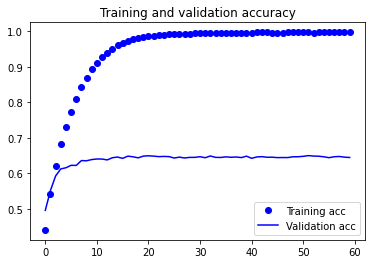

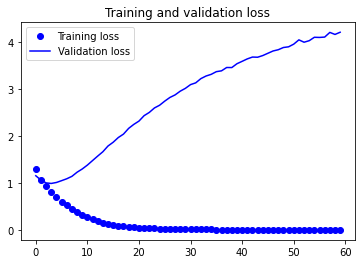

In [107]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Step 3 – Evaluate the Model using Testing Data 

In [ ]:
# Model #1 (replicate where necessary for other models)
model.load_weights('text_model_1.h5')


In [ ]:
# Save the Best Model
model.save('text_model_best.h5')

## Step 4 – Use the Best Model to make prediction

In [ ]:
model.load_weights('text_model_best.h5')

In [ ]:
# takes the user input
text_input = np.array([input()])

In [ ]:
# convert the user input into numeric tensor


In [ ]:
# show the model output using predict function
